In [2]:
import pandas as pd
import numpy as np
groceries  = pd.read_csv("https://raw.githubusercontent.com/rahulsengupta/BasketAnalysis_Groceries/master/groceries.csv", sep=";", names=['Transaction'])
groceries

,Transaction
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [3]:
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder


# get all the transcactions as a list
transcactions = list(groceries['Transaction'].apply(lambda x: sorted(x.split(','))))


# instantiate transcation encoder
encoder = TransactionEncoder().fit(transcactions)

onehot = encoder.transform(transcactions)

# convert one-hot encode data to DataFrame
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 3, use_colnames=True)

In [4]:
# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
9813,"(bottled beer, red/blush wine)",(liquor),0.004881,0.011083,0.001932,0.395833,35.715787,0.001878,1.636828,2
5435,"(soda, hamburger meat)",(Instant food products),0.005796,0.008033,0.001220,0.210526,26.209194,0.001174,1.256492,2
34594,"(white bread, ham)",(processed cheese),0.005084,0.016573,0.001932,0.380000,22.928221,0.001848,1.586172,2
9812,"(bottled beer, liquor)",(red/blush wine),0.004677,0.019217,0.001932,0.413043,21.493559,0.001842,1.670963,2
5434,"(soda, Instant food products)",(hamburger meat),0.001932,0.033249,0.001220,0.631579,18.995654,0.001156,2.624040,2


In [5]:
# Import seaborn under its standard alias
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

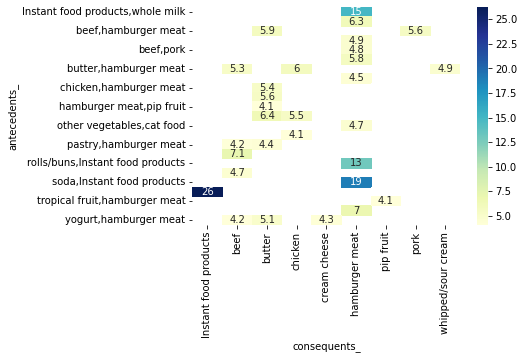

In [30]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[(rules['lhs items']>1) & (rules['lift']>4) & (rules_2['confidence']>0.15)].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [8]:
rules_1=  rules[rules['antecedents_'].str.contains("beer") | rules['consequents_'].str.contains("beer")]
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
560,(bottled water),(bottled beer),0.110524,0.080529,0.015760,0.142594,1.770726,0.006860,1.072388,1,bottled water,bottled beer
561,(bottled beer),(bottled water),0.080529,0.110524,0.015760,0.195707,1.770726,0.006860,1.105911,1,bottled beer,bottled water
562,(bottled beer),(butter),0.080529,0.055414,0.005796,0.071970,1.298756,0.001333,1.017839,1,bottled beer,butter
563,(butter),(bottled beer),0.055414,0.080529,0.005796,0.104587,1.298756,0.001333,1.026869,1,butter,bottled beer
564,(canned fish),(bottled beer),0.015048,0.080529,0.001830,0.121622,1.510289,0.000618,1.046783,1,canned fish,bottled beer
...,...,...,...,...,...,...,...,...,...,...,...,...
18639,(tropical fruit),"(canned beer, whole milk)",0.104931,0.008846,0.001118,0.010659,1.204947,0.000190,1.001832,1,tropical fruit,"canned beer,whole milk"
18640,"(yogurt, canned beer)",(whole milk),0.005389,0.255516,0.002237,0.415094,1.624534,0.000860,1.272827,2,"yogurt,canned beer",whole milk
18641,"(canned beer, whole milk)",(yogurt),0.008846,0.139502,0.002237,0.252874,1.812691,0.001003,1.151744,2,"canned beer,whole milk",yogurt
18642,(yogurt),"(canned beer, whole milk)",0.139502,0.008846,0.002237,0.016035,1.812691,0.001003,1.007306,1,yogurt,"canned beer,whole milk"


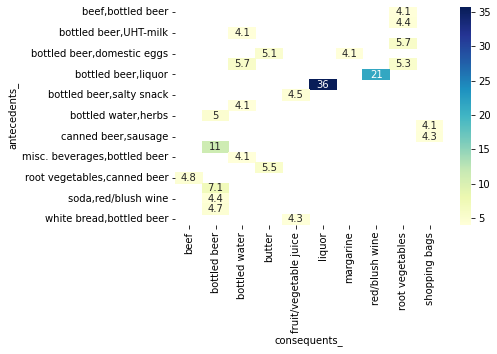

In [22]:
pivot_1 = rules_1[(rules_1['lhs items']>1)  & (rules_1['lift']>4) & (rules_1['confidence']>0.2)   ].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_1, annot = True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [10]:
rules_2=  rules[rules['antecedents_'].str.contains("hamburger") | rules['consequents_'].str.contains("hamburger")]
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
12,(Instant food products),(hamburger meat),0.008033,0.033249,0.003050,0.379747,11.421438,0.002783,1.558640,1,Instant food products,hamburger meat
13,(hamburger meat),(Instant food products),0.033249,0.008033,0.003050,0.091743,11.421438,0.002783,1.092166,1,hamburger meat,Instant food products
78,(hamburger meat),(UHT-milk),0.033249,0.033452,0.001729,0.051988,1.554102,0.000616,1.019552,1,hamburger meat,UHT-milk
79,(UHT-milk),(hamburger meat),0.033452,0.033249,0.001729,0.051672,1.554102,0.000616,1.019427,1,UHT-milk,hamburger meat
182,(hamburger meat),(baking powder),0.033249,0.017692,0.001322,0.039755,2.247091,0.000734,1.022977,1,hamburger meat,baking powder
...,...,...,...,...,...,...,...,...,...,...,...,...
35269,"(hamburger meat, whole milk)",(yogurt),0.014743,0.139502,0.003965,0.268966,1.928044,0.001909,1.177097,2,"hamburger meat,whole milk",yogurt
35270,"(yogurt, hamburger meat)",(whole milk),0.006507,0.255516,0.003965,0.609375,2.384880,0.002303,1.905879,2,"yogurt,hamburger meat",whole milk
35271,(whole milk),"(yogurt, hamburger meat)",0.255516,0.006507,0.003965,0.015519,2.384880,0.002303,1.009154,1,whole milk,"yogurt,hamburger meat"
35272,(yogurt),"(hamburger meat, whole milk)",0.139502,0.014743,0.003965,0.028426,1.928044,0.001909,1.014083,1,yogurt,"hamburger meat,whole milk"


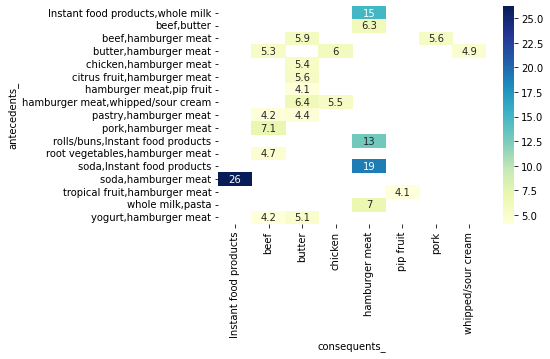

In [21]:
pivot_2 = rules_2[(rules_2['lhs items']>1)  & (rules_2['lift']>4) & (rules_2['confidence']>0.2)  ].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_2, annot = True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [32]:
rules_3=  rules[rules['antecedents_'].str.contains("cat food") | rules['consequents_'].str.contains("cat food")]
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
52,(cat food),(UHT-milk),0.023284,0.033452,0.001525,0.065502,1.958097,0.000746,1.034297,1,cat food,UHT-milk
53,(UHT-milk),(cat food),0.033452,0.023284,0.001525,0.045593,1.958097,0.000746,1.023374,1,UHT-milk,cat food
246,(beef),(cat food),0.052466,0.023284,0.003457,0.065891,2.829881,0.002235,1.045613,1,beef,cat food
247,(cat food),(beef),0.023284,0.052466,0.003457,0.148472,2.829881,0.002235,1.112745,1,cat food,beef
390,(cat food),(berries),0.023284,0.033249,0.001423,0.061135,1.838735,0.000649,1.029703,1,cat food,berries
...,...,...,...,...,...,...,...,...,...,...,...,...
19221,"(yogurt, cat food)",(whole milk),0.006202,0.255516,0.002745,0.442623,1.732271,0.001161,1.335692,2,"yogurt,cat food",whole milk
19222,"(whole milk, cat food)",(yogurt),0.008846,0.139502,0.002745,0.310345,2.224666,0.001511,1.247722,2,"whole milk,cat food",yogurt
19223,(yogurt),"(whole milk, cat food)",0.139502,0.008846,0.002745,0.019679,2.224666,0.001511,1.011051,1,yogurt,"whole milk,cat food"
19224,(whole milk),"(yogurt, cat food)",0.255516,0.006202,0.002745,0.010744,1.732271,0.001161,1.004591,1,whole milk,"yogurt,cat food"


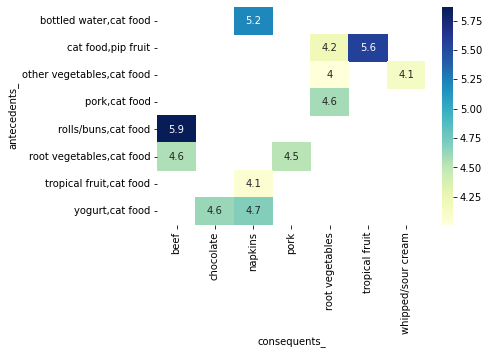

In [33]:
pivot_3 = rules_3[(rules_3['lhs items']>1)  & (rules_3['lift']>4) & (rules_3['confidence']>0.2)   ].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_3, annot = True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()